In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition

In [13]:
iris = pd.read_table('iris.data.txt', delimiter=',',header = None)
iris_data = iris[[0,1,2,3]]
iris_target = iris[4]
print(iris)

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
5    5.4  3.9  1.7  0.4     Iris-setosa
6    4.6  3.4  1.4  0.3     Iris-setosa
7    5.0  3.4  1.5  0.2     Iris-setosa
8    4.4  2.9  1.4  0.2     Iris-setosa
9    4.9  3.1  1.5  0.1     Iris-setosa
10   5.4  3.7  1.5  0.2     Iris-setosa
11   4.8  3.4  1.6  0.2     Iris-setosa
12   4.8  3.0  1.4  0.1     Iris-setosa
13   4.3  3.0  1.1  0.1     Iris-setosa
14   5.8  4.0  1.2  0.2     Iris-setosa
15   5.7  4.4  1.5  0.4     Iris-setosa
16   5.4  3.9  1.3  0.4     Iris-setosa
17   5.1  3.5  1.4  0.3     Iris-setosa
18   5.7  3.8  1.7  0.3     Iris-setosa
19   5.1  3.8  1.5  0.3     Iris-setosa
20   5.4  3.4  1.7  0.2     Iris-setosa
21   5.1  3.7  1.5  0.4     Iris-setosa
22   4.6  3.6  1.0  0.2     Iris-setosa
23   5.1  3.3  1.7  0.5     Iris-setosa


# PCA
## Standardize the data
Find the average of each column separately, and subtract the average from the original data

In [3]:
X = np.mat(iris_data)
X_mean = np.mean(X,axis=0)
X_meanRemoved = X - X_mean
n_samples,n_features = X.shape
print(X.shape,n_samples,n_features)
print(X_meanRemoved)

(150, 4) 150 4
[[-7.43333333e-01  4.46000000e-01 -2.35866667e+00 -9.98666667e-01]
 [-9.43333333e-01 -5.40000000e-02 -2.35866667e+00 -9.98666667e-01]
 [-1.14333333e+00  1.46000000e-01 -2.45866667e+00 -9.98666667e-01]
 [-1.24333333e+00  4.60000000e-02 -2.25866667e+00 -9.98666667e-01]
 [-8.43333333e-01  5.46000000e-01 -2.35866667e+00 -9.98666667e-01]
 [-4.43333333e-01  8.46000000e-01 -2.05866667e+00 -7.98666667e-01]
 [-1.24333333e+00  3.46000000e-01 -2.35866667e+00 -8.98666667e-01]
 [-8.43333333e-01  3.46000000e-01 -2.25866667e+00 -9.98666667e-01]
 [-1.44333333e+00 -1.54000000e-01 -2.35866667e+00 -9.98666667e-01]
 [-9.43333333e-01  4.60000000e-02 -2.25866667e+00 -1.09866667e+00]
 [-4.43333333e-01  6.46000000e-01 -2.25866667e+00 -9.98666667e-01]
 [-1.04333333e+00  3.46000000e-01 -2.15866667e+00 -9.98666667e-01]
 [-1.04333333e+00 -5.40000000e-02 -2.35866667e+00 -1.09866667e+00]
 [-1.54333333e+00 -5.40000000e-02 -2.65866667e+00 -1.09866667e+00]
 [-4.33333333e-02  9.46000000e-01 -2.55866667e+

## Compute the covariance matrix
$
\sum_{}\widehat{X}^T \widehat{X}
$

In [5]:
covMat = np.dot(X_meanRemoved.T, X_meanRemoved)
print(covMat)

[[102.16833333  -5.851      189.77866667  77.01866667]
 [ -5.851       28.0126     -47.9352     -17.5792    ]
 [189.77866667 -47.9352     463.86373333 193.16173333]
 [ 77.01866667 -17.5792     193.16173333  86.77973333]]


## eigvectors

In [6]:
eigVals,eigVects=np.linalg.eig(np.mat(covMat))
eig_pairs = [(np.abs(eigVals[i]), eigVects[:,i]) for i in range(n_features)]
# sort eig_vec based on eig_val from highest to lowest
eig_pairs.sort(reverse=True)
# Compute r eigenvectors with largest eigenvalues
C=np.array([ele[1] for ele in eig_pairs[:2]])
#get new data
Y=np.dot(X,np.transpose(C))
print(Y[:10])

[[ 2.82713597 -5.64133105]
 [ 2.79595248 -5.14516688]
 [ 2.62152356 -5.17737812]
 [ 2.7649059  -5.00359942]
 [ 2.78275012 -5.64864829]
 [ 3.23144574 -6.06250644]
 [ 2.69045242 -5.23261922]
 [ 2.8848611  -5.48512908]
 [ 2.62338453 -4.7439257 ]
 [ 2.83749841 -5.20803203]]


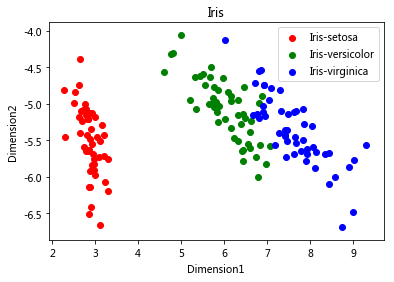

In [7]:
# PCA to 2-D
ax = plt.figure()
for color,target_name in zip("rgb", ['Iris-setosa','Iris-versicolor','Iris-virginica']):
    plt.scatter(np.array(Y[iris_target == target_name, 0]), np.array(Y[iris_target == target_name, 1]), c=color,label=target_name)
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
plt.title("Iris")
plt.legend()
plt.show()

# PLA
## Generate {$X_k$} matrix according to the labels of the examples.

In [8]:
X_K = []
for label,i in zip(['Iris-setosa','Iris-versicolor','Iris-virginica'],range(n_features)):
    X_K.append(X[iris_target == label])
    print('X_%s: %s\n' % (label, X_K[i][:5]))

X_Iris-setosa: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

X_Iris-versicolor: [[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]

X_Iris-virginica: [[6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [6.3 2.9 5.6 1.8]
 [6.5 3.  5.8 2.2]]



## Compute the class-wise mean and the total mean of the data matrix

In [11]:
mean_class = []
mean_total = np.mean(X, axis=0)
print('Total mean of the data matrix of:%s'%mean_total)
for label,i in zip(['Iris-setosa','Iris-versicolor','Iris-virginica'],range(n_features)):
    mean_class.append(np.mean(X_K[i], axis=0))
    print('Class-wise mean of %s: %s\n' % (label, mean_class[i]))

Total mean of the data matrix of:[[5.84333333 3.054      3.75866667 1.19866667]]
Class-wise mean of Iris-setosa: [[5.006 3.418 1.464 0.244]]

Class-wise mean of Iris-versicolor: [[5.936 2.77  4.26  1.326]]

Class-wise mean of Iris-virginica: [[6.588 2.974 5.552 2.026]]



##  Compute the within-class covariance matrix $S_W$

In [13]:
d = n_features  # number of features
S_W = np.zeros((d, d))
for label, mc in zip(['Iris-setosa','Iris-versicolor','Iris-virginica'], mean_class):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X[iris_target == label]:
        row, mc = row.reshape(d, 1), mc.reshape(d, 1)  # make column vectors
        class_scatter += (row - mc).dot((row - mc).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: %sx%s \n' % (S_W.shape[0], S_W.shape[1]),S_W)

Within-class scatter matrix: 4x4 
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


## Compute the between-class covariance matrix $S_B$

In [15]:
mean_total = np.mean(X, axis=0)
S_B = np.zeros((d, d))
for label, mc in zip(['Iris-setosa','Iris-versicolor','Iris-virginica'],mean_class):
    n = X[iris_target ==label,:].shape[0]
    mc = mc.reshape(d, 1)  # make column vector
    mean_total = mean_total.reshape(d, 1)  # make column vector
    S_B += n * (mc - mean_total).dot((mc - mean_total).T)
print('Between-class covariance matrix: %sx%s \n' % (S_B.shape[0], S_B.shape[1]),S_B)

Between-class covariance matrix: 4x4 
 [[ 63.21213333 -19.534      165.16466667  71.36306667]
 [-19.534       10.9776     -56.0552     -22.4924    ]
 [165.16466667 -56.0552     436.64373333 186.90813333]
 [ 71.36306667 -22.4924     186.90813333  80.60413333]]


## Find K-1 projection eigvector of ${S_B^{-1}}{S_W}$ as the matrix C and transform the data matrix X

In [17]:
eigVals_PLA, eigVecs_PLA = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [18]:
eig_pairs_PLA = [(np.abs(eigVals_PLA[i]), eigVecs_PLA[:,i]) for i in range(n_features)]
# sort eig_vec based on eig_val from highest to lowest
eig_pairs_PLA.sort(reverse=True)
# Compute r eigenvectors with largest eigenvalues
C_PLA=np.array([ele[1] for ele in eig_pairs_PLA[:2]])
#get new data
Y_PLA=np.dot(X,np.transpose(C_PLA))
print(Y_PLA[:10],Y_PLA.shape)

[[ 1.49220928 -1.9047102 ]
 [ 1.25765567 -1.60841445]
 [ 1.3487506  -1.74984635]
 [ 1.18024885 -1.63919095]
 [ 1.51043263 -1.96271183]
 [ 1.40183784 -2.22012481]
 [ 1.27966155 -1.91802239]
 [ 1.37835575 -1.81948346]
 [ 1.11648646 -1.54502342]
 [ 1.3131003  -1.56518244]] (150, 2)


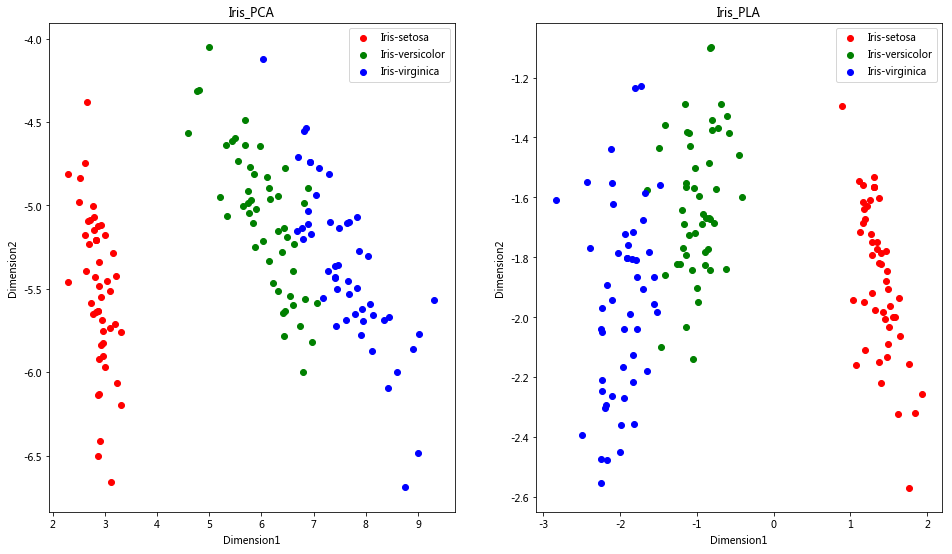

In [19]:
plt.figure(figsize=(16,9))
plt.subplot(1, 2, 1)
for color,target_name in zip("rgb", ['Iris-setosa','Iris-versicolor','Iris-virginica']):
    plt.scatter(np.array(Y[iris_target == target_name, 0]), np.array(Y[iris_target == target_name, 1]), c=color,label=target_name)
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
plt.title("Iris_PCA")
plt.legend()

plt.subplot(1, 2, 2)
for color,target_name in zip("rgb", ['Iris-setosa','Iris-versicolor','Iris-virginica']):
    plt.scatter(np.array(Y_PLA[iris_target == target_name, 0]), np.array(Y_PLA[iris_target == target_name, 1]), c=color,label=target_name)
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
plt.title("Iris_PLA")
plt.legend()
plt.show()

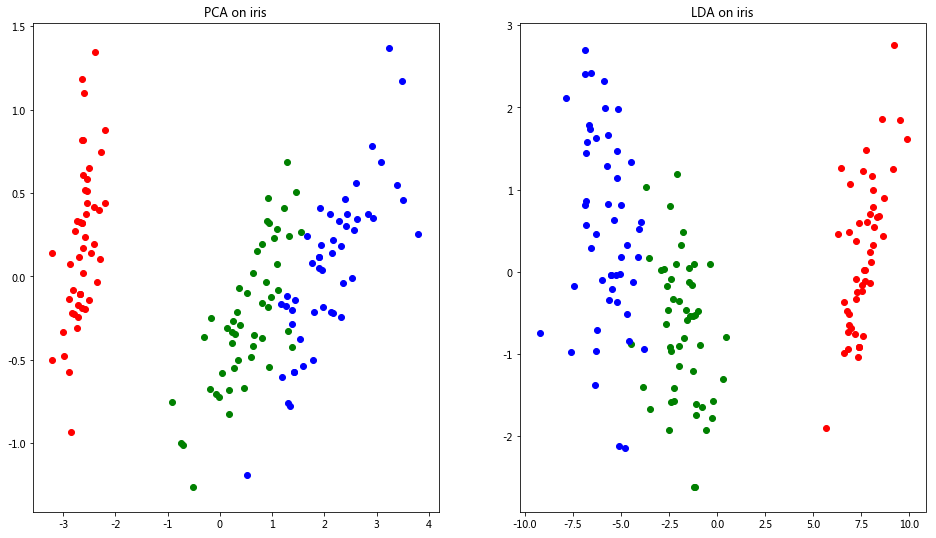

In [118]:
def PCA(data, n):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=n)
    pca_result  = pca.fit_transform(data)
    return pca_result

def LDA(data,target, n):
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    lda = LDA(n_components=n)
    lda_result = lda.fit_transform(data,target)
    return lda_result

def plot(data,target, n):
    pca_result = PCA(data, n)
    lda_result = LDA(data,target, n)
    
    plt.figure(figsize=(16,9))
    plt.subplot(1, 2, 1)
    for color,target_name in zip("rgb", ['Iris-setosa','Iris-versicolor','Iris-virginica']):
        plt.scatter(np.array(pca_result[iris_target == target_name, 0]), np.array(pca_result[iris_target == target_name, 1]), c=color, label=target_name)
    plt.title('PCA on iris')

    plt.subplot(1, 2, 2)
    for color,target_name in zip("rgb", ['Iris-setosa','Iris-versicolor','Iris-virginica']):
        plt.scatter(np.array(lda_result[iris_target == target_name, 0]), np.array(lda_result[iris_target == target_name, 1]), c=color, label=target_name)
    plt.title('LDA on iris')
    plt.show()
    
plot(X,iris_target,2)